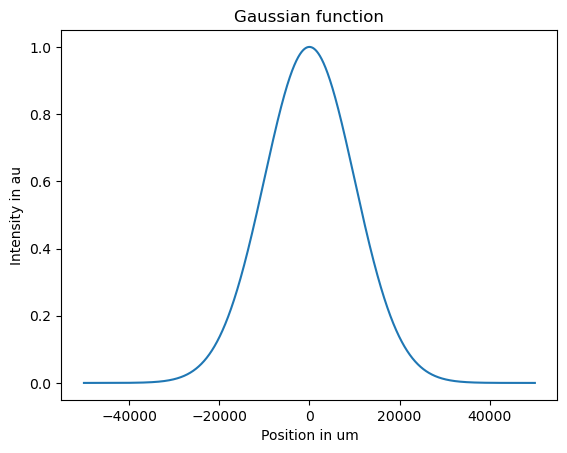

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# copied from above 

def propTF(uin_V_m, L_m, lambda_m, z_m):
    M = uin_V_m.size        # number of samples (grid points)
    dx_m = L_m/M            # grid spacing
    k_1_m = 2*np.pi/lambda_m # wavenumber

    # Frequency coordinates
    fx_1_m = np.linspace(-1/(2*dx_m), 1/(2*dx_m) - (1/L_m), M)
    
    # Transfer function for Fresnel propagation
    H = np.exp(-1j * np.pi * lambda_m * z_m * (fx_1_m**2))
    H = np.fft.fftshift(H)

    # Fourier transform input field
    Uin_V_m = np.fft.fft(np.fft.fftshift(uin_V_m))

    # Multiply in Fourier space
    Uout_V_m = H * Uin_V_m

    # Inverse FFT → propagated field
    uout_V_m = np.fft.ifftshift(np.fft.ifft(Uout_V_m))
    return uout_V_m


dx_m = 0.1e-6 #grid size, m:meter
Dx_m = 100e-3 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

x_mean_m = 0.0 #centered on...
x_std_m = 10e-3 #widthofgaussian
g = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2))) # gaussian intensity distribution 
plt.plot(x_m*1e6, g)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Gaussian function")

plt.show()

E0 = np.sqrt(g)

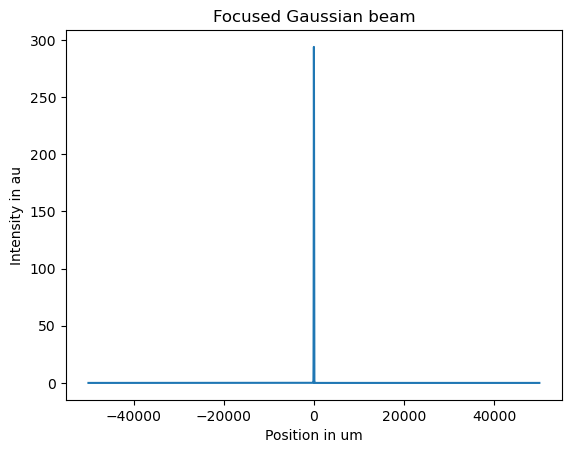

0.034


In [2]:
# Lens equation: 1/f_m = 1/p_m+1/q_m
# Lens phase: exp(i*(2*pi/lambda_m)/(2*f_m)*x_m^2)

wavelength_m = 500e-9

p_m = 10 
q_m = 34e-3
f_m = 1/(1/(p_m) + (1/q_m)) #f_m = focal length, p_m = z_pm

zp_m = q_m 

lens = np.exp(-1j*(2*np.pi/wavelength_m)/(2*f_m)*x_m**2)

Ef = propTF(E0*lens, Dx_m, wavelength_m, zp_m) 

plt.plot(x_m*1e6, np.abs(Ef)**2)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Focused Gaussian beam")

plt.show()

print(zp_m)

In [3]:
print(dx_m/wavelength_m/zp_m*Dx_m)

0.5882352941176471


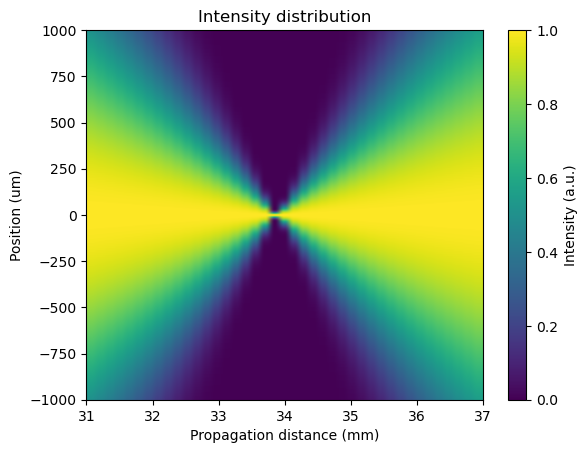

In [14]:
# scan zp_m between -1 mm and 1 mm and plot intensity metrics
z_scan = zp_m + np.linspace(-3e-3, 3e-3, 41)  # meters
max_I = np.zeros_like(z_scan)
onaxis_I = np.zeros_like(z_scan)

ix0 = np.argmin(np.abs(x_m))  # index of x ~= 0

E_z = np.zeros((x_m.size, z_scan.size), dtype=complex)
E_n_z = np.zeros_like(E_z)  # normalized field for intensity comparison 

for i, z in enumerate(z_scan):
    E_z[:, i] = propTF(E0 * lens, Dx_m, wavelength_m, z)
    E_n_z[:, i] = E_z[:, i] / np.max(np.abs(E_z[:, i]))  # normalize to max intensity

plt.imshow(np.abs(E_n_z)**2, extent=(z_scan[0]*1e3, z_scan[-1]*1e3, x_m[0]*1e6, x_m[-1]*1e6), aspect='auto')
plt.colorbar(label='Intensity (a.u.)')
plt.xlabel('Propagation distance (mm)')
plt.ylabel('Position (um)')
plt.ylim(-1000, 1000)
plt.title('Intensity distribution')
plt.show()


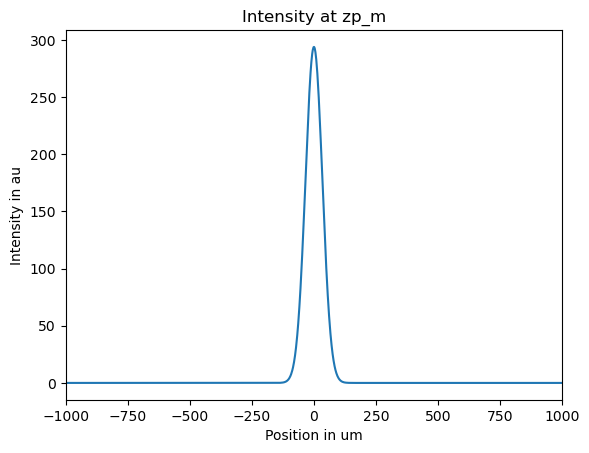

In [5]:
#gerber saxton 

plt.plot(x_m*1e6, np.abs(E_z[:, 20])**2)
plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

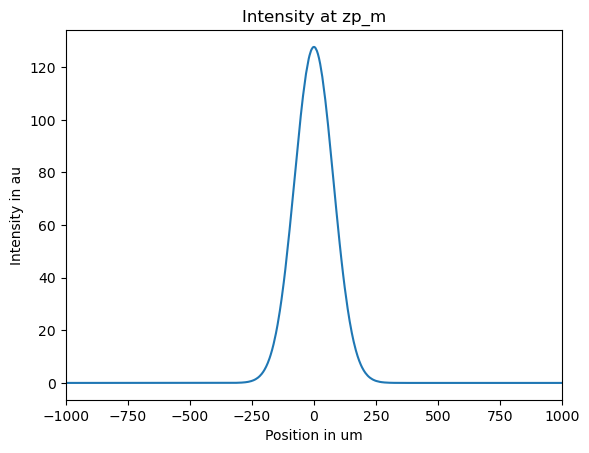

In [6]:


plt.plot(x_m*1e6, np.abs(E_z[:, 21])**2)
plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

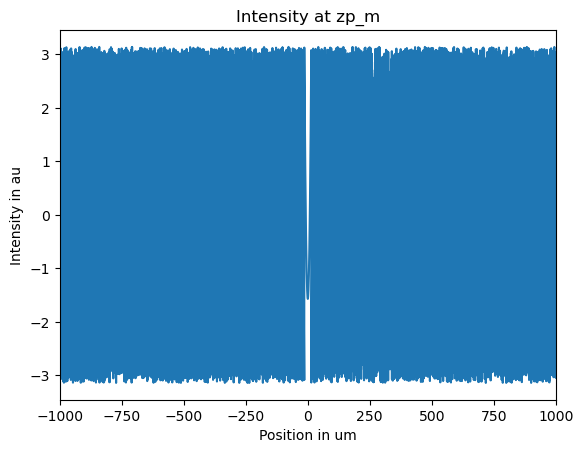

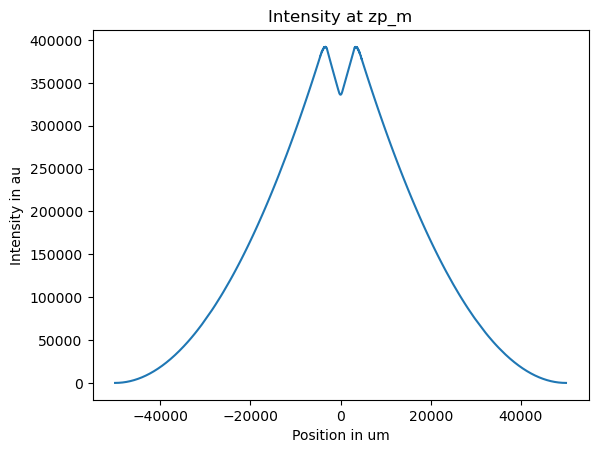

In [7]:


plt.plot(x_m*1e6, np.angle(E_z[:, 21]))
plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

#to see unwrapped 
plt.plot(x_m*1e6, np.unwrap(np.angle(E_z[:, 21])))
# plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()


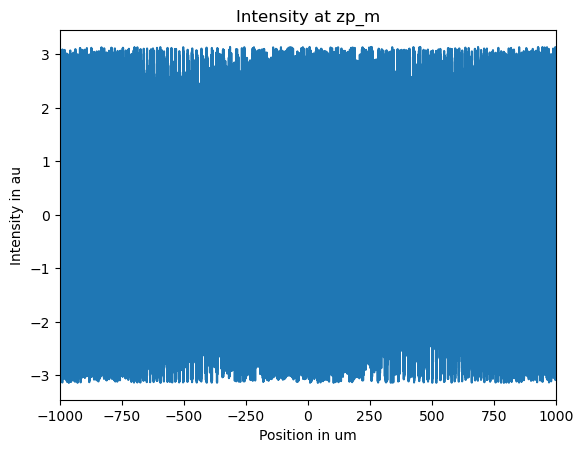

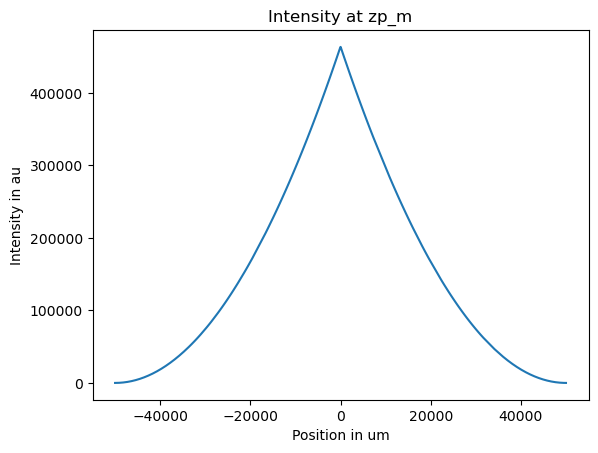

In [8]:


plt.plot(x_m*1e6, np.angle(E_z[:, 19]))
plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

#to see unwrapped 
plt.plot(x_m*1e6, np.unwrap(np.angle(E_z[:, 19])))
# plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

#upside down before focus


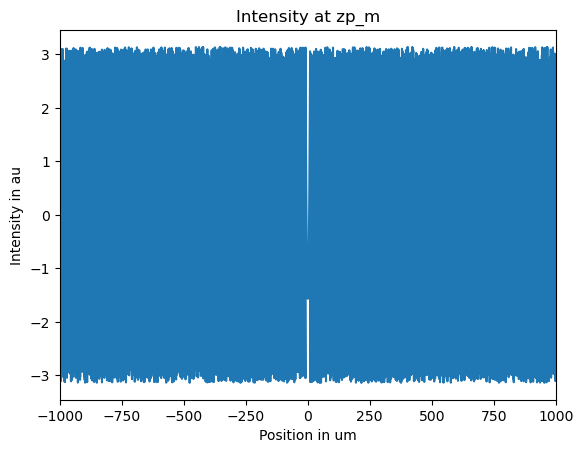

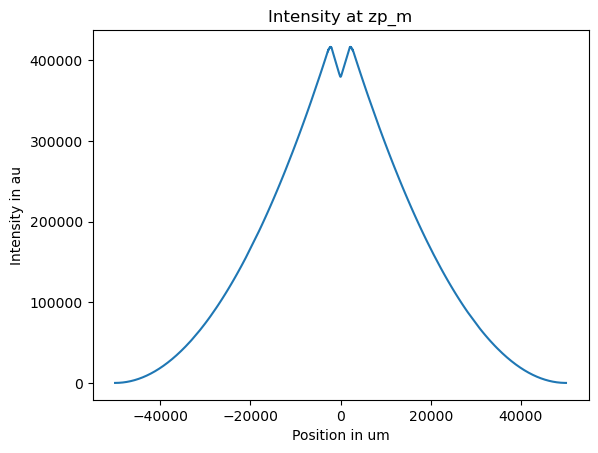

In [9]:
#phase should be mostly flat at focus

plt.plot(x_m*1e6, np.angle(E_z[:, 20]))
plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()

#to see unwrapped 
plt.plot(x_m*1e6, np.unwrap(np.angle(E_z[:, 20])))
# plt.xlim(-1000, 1000)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m")
plt.show()


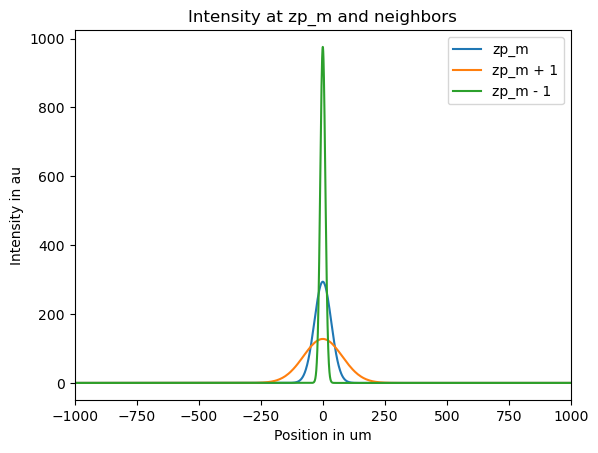

In [10]:
I_z = np.abs(E_z[:, 20])**2
I_z_n = np.abs(E_z[:, 21])**2 #p: plus 1
I_z_p = np.abs(E_z[:, 19])**2 #m: minus 1

plt.plot(x_m*1e6, I_z, label='zp_m')
plt.plot(x_m*1e6, I_z_n, label='zp_m + 1')
plt.plot(x_m*1e6, I_z_p, label='zp_m - 1')
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Intensity at zp_m and neighbors")
plt.legend()
plt.xlim(-1000, 1000)
plt.show()


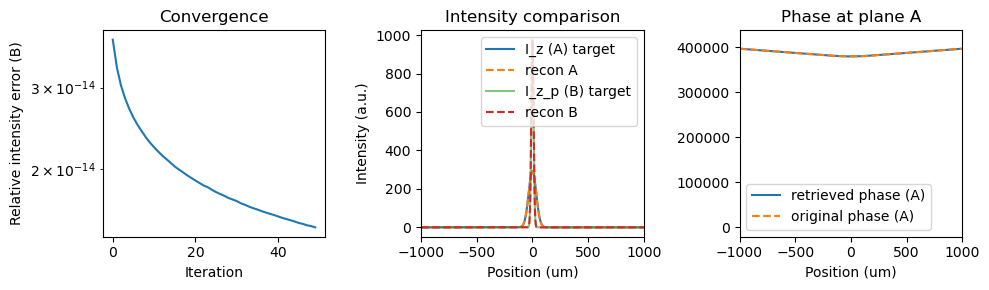

In [11]:
# Gerchberg-Saxton phase retrieval between I_z (plane A) and I_z_p (plane B)
# Uses existing variables: I_z, I_z_p, Dx_m, wavelength_m, z_scan, Ef, E_z, x_m, propTF

idx_A = 20   # index used earlier for I_z
idx_B = 19   # index used earlier for I_z_p

# propagation distance from A -> B
dz = z_scan[idx_B] - z_scan[idx_A]

#initiates amplitudes "from measurements" 
amp_A = np.sqrt(np.maximum(I_z, 0))
amp_B = np.sqrt(np.maximum(I_z_p, 0))

# initial phase guess at plane A: use Ef phase if available, otherwise random
try:
    init_phase = np.angle(Ef)
    if init_phase.size != amp_A.size:
        raise Exception()
except Exception:
    init_phase = np.random.uniform(-np.pi, np.pi, size=amp_A.size)

u_A = amp_A * np.exp(1j * init_phase)

n_iter = 50
errors = np.zeros(n_iter)

for k in range(n_iter):
    # forward propagate A -> B
    u_B = propTF(u_A, Dx_m, wavelength_m, dz)

    # enforce amplitude at B
    u_B = amp_B * np.exp(1j * np.angle(u_B))

    # back propagate B -> A
    u_A = propTF(u_B, Dx_m, wavelength_m, -dz)

    # enforce amplitude at A
    u_A = amp_A * np.exp(1j * np.angle(u_A))

    # compute error at B (normalized RMS of intensity)
    recon_B = propTF(u_A, Dx_m, wavelength_m, dz)
    err = np.linalg.norm(np.abs(recon_B)**2 - I_z_p) / (np.linalg.norm(I_z_p) + 1e-20)
    errors[k] = err

# final reconstructed fields
recon_A = u_A
recon_B = propTF(recon_A, Dx_m, wavelength_m, dz)

# plots: error convergence, intensity comparison, phase comparison
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.semilogy(errors + 1e-20)
plt.xlabel('Iteration')
plt.ylabel('Relative intensity error (B)')
plt.title('Convergence')

plt.subplot(1, 3, 2)
plt.plot(x_m*1e6, I_z, label='I_z (A) target')
plt.plot(x_m*1e6, np.abs(recon_A)**2, '--', label='recon A')
plt.plot(x_m*1e6, I_z_p, label='I_z_p (B) target', alpha=0.6)
plt.plot(x_m*1e6, np.abs(recon_B)**2, '--', label='recon B')
plt.xlim(-1000, 1000)
plt.xlabel('Position (um)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('Intensity comparison')

plt.subplot(1, 3, 3)
# compare retrieved phase at A to original phase (if available in E_z)
plt.plot(x_m*1e6, np.unwrap(np.angle(recon_A)), label='retrieved phase (A)')
try:
    orig_phase_A = np.unwrap(np.angle(E_z[:, idx_A]))
    plt.plot(x_m*1e6, orig_phase_A, '--', label='original phase (A)')
except Exception:
    pass
plt.xlim(-1000, 1000)
plt.xlabel('Position (um)')
plt.title('Phase at plane A')
plt.legend()

plt.tight_layout()
plt.show()

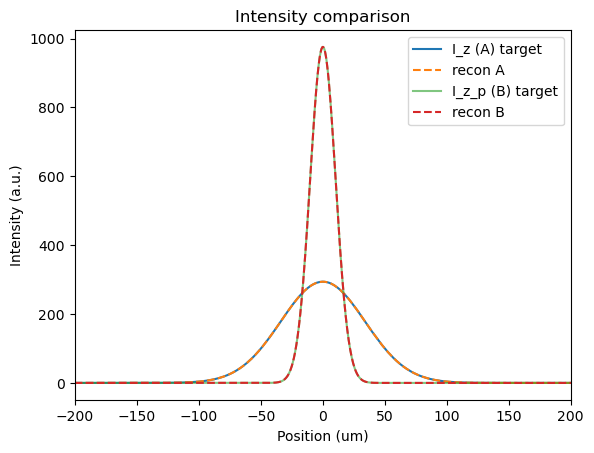

In [ ]:



plt.plot(x_m*1e6, I_z, label='I_z (A) target')
plt.plot(x_m*1e6, np.abs(recon_A)**2, '--', label='recon A')
plt.plot(x_m*1e6, I_z_p, label='I_z_p (B) target', alpha=0.6)
plt.plot(x_m*1e6, np.abs(recon_B)**2, '--', label='recon B')
plt.xlim(-200, 200)
plt.xlabel('Position (um)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('Intensity comparison')
plt.show()


#shouldn't use the normalized one  


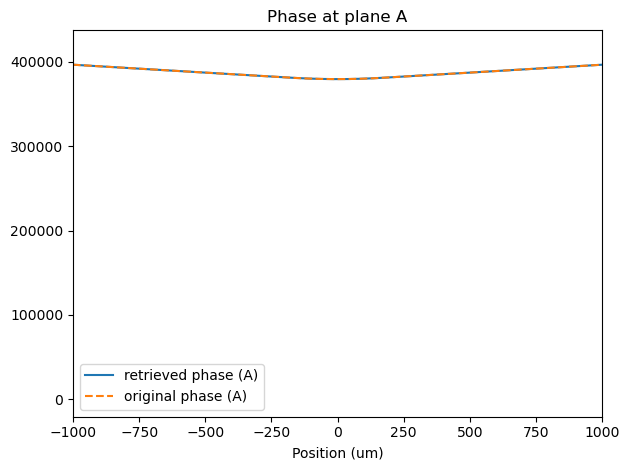

In [13]:

# compare retrieved phase at A to original phase (if available in E_z)
plt.plot(x_m*1e6, np.unwrap(np.angle(recon_A)), label='retrieved phase (A)')
try:
    orig_phase_A = np.unwrap(np.angle(E_z[:, idx_A]))
    plt.plot(x_m*1e6, orig_phase_A, '--', label='original phase (A)')
except Exception:
    pass
plt.xlim(-1000, 1000)
plt.xlabel('Position (um)')
plt.title('Phase at plane A')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# take actual data at best focus and 1 or 2 steps after and before, and run GS on that
# don't actually know propagation distance bc of scaling issues from last time
